In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv('matches.csv')
df2=pd.read_csv('deliveries[1].csv')


df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# number of season in matches
df1.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [8]:
#team won by maximum runs
df1[df1.win_by_runs==df1.win_by_runs.max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [14]:
#team won by maximum wickets
df1[df1.win_by_wickets==df1.win_by_wickets.max()].winner.head()

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
Name: winner, dtype: object

<AxesSubplot:xlabel='season', ylabel='count'>

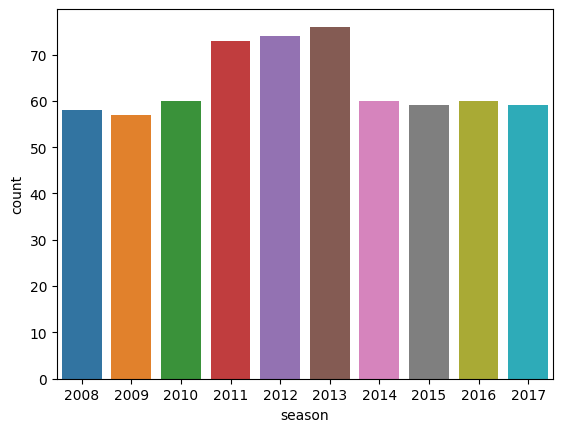

In [17]:
#season which had most number of matches
sns.countplot(x='season',data=df1)

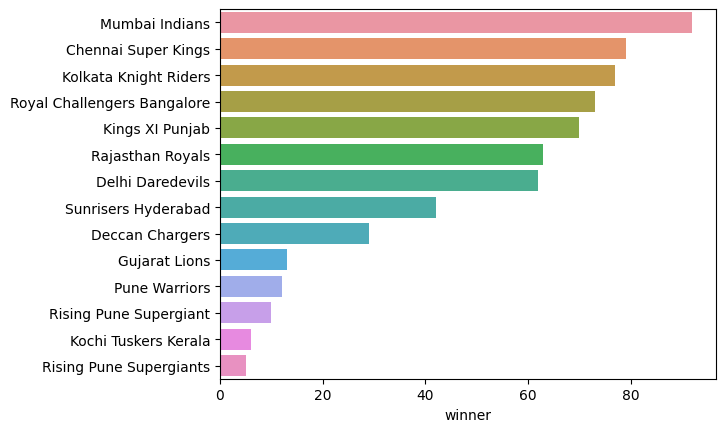

In [30]:
#most winning team in dataset
team=df1.winner.value_counts()
sns.barplot(x=team,y=team.index,orient='h')
plt.show()

In [32]:
#top player of the match winner
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

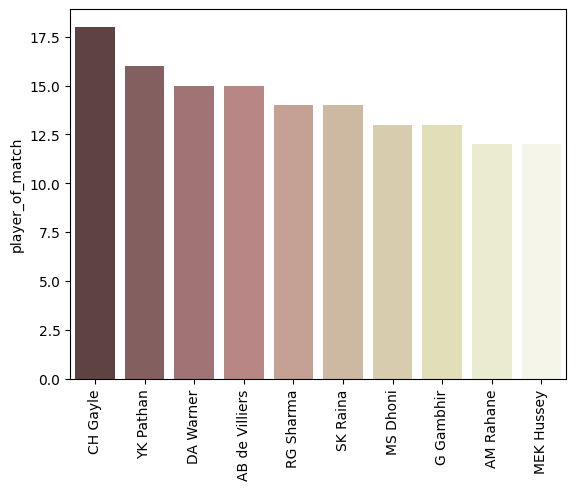

In [42]:
topplayer=df1.player_of_match.value_counts()[:10]
sns.barplot(x=topplayer.index,y=topplayer,orient='v',palette='pink')
plt.xticks(rotation='vertical')
plt.show()

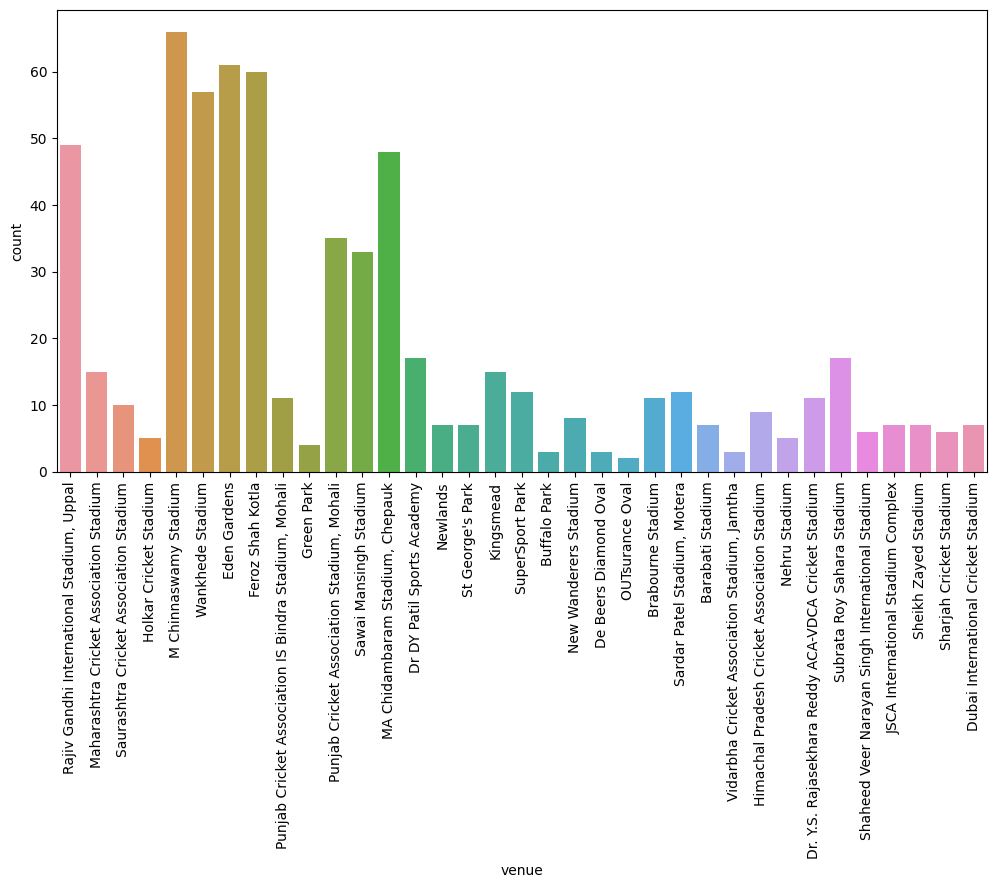

In [41]:
#number of matches in each venue
plt.figure(figsize=(12,6))
sns.countplot(x='venue',data=df1)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='value', ylabel='count'>

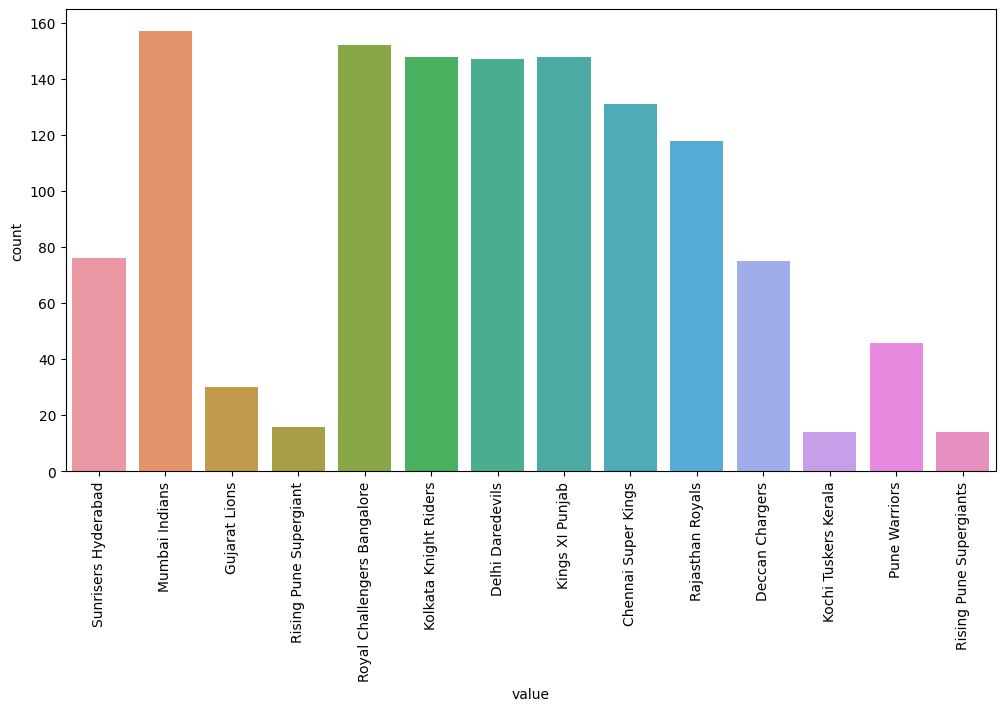

In [47]:
#number of matches played by each team
no_match=pd.melt(df1,id_vars=['id','season'],value_vars=['team1','team2'])
no_match
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.countplot(x='value',data=no_match)

<AxesSubplot:xlabel='winner', ylabel='count'>

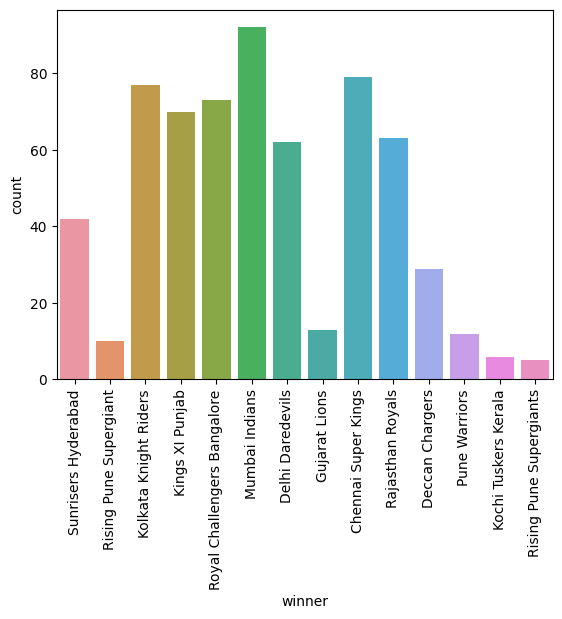

In [49]:
#number of wins per team
plt.xticks(rotation='vertical')
sns.countplot(x='winner',data=df1)


In [54]:
#champions of all season
temp1=df1.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
temp1

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


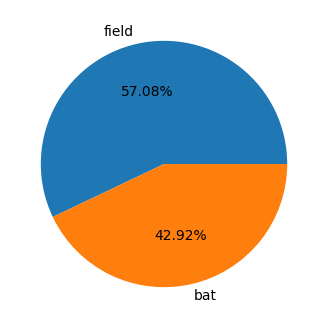

<AxesSubplot:xlabel='season', ylabel='count'>

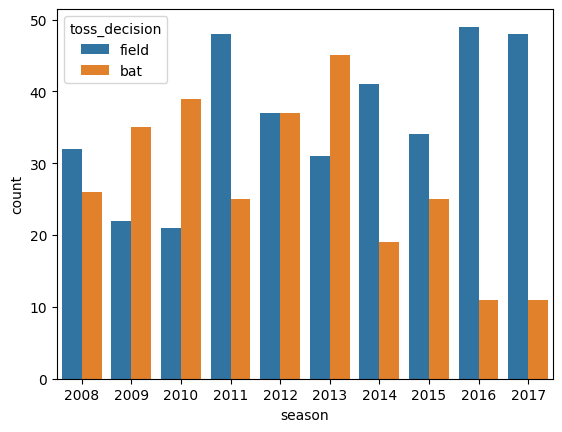

In [64]:
#toss decision bat/field
temp2=df1.toss_decision.value_counts()
label=temp2.index
plt.figure(figsize=(4,4))
plt.pie(temp2,labels=label,autopct='%1.2f%%')
plt.show()
sns.countplot(x='season',data=df1,hue='toss_decision')

<AxesSubplot:ylabel='value'>

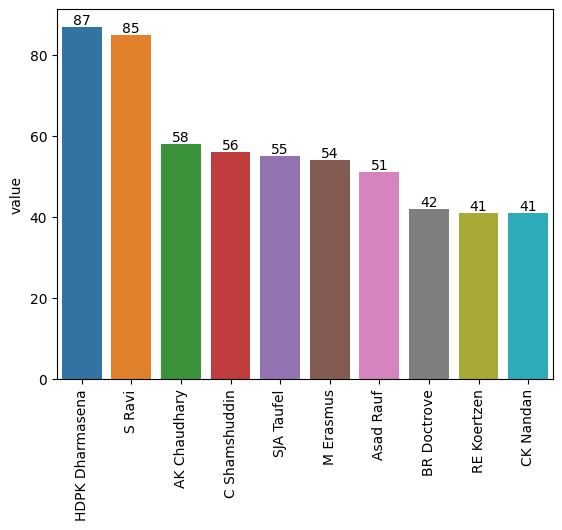

In [81]:
#top umpires
temp3=pd.melt(df1,id_vars=['id'],value_vars=['umpire1','umpire2'])
m=temp3.value.value_counts()[:10]
plt.xticks(rotation='vertical')
ax=sns.barplot(x=m.index,y=m)
for i in ax.containers:
    ax.bar_label(i,)
ax

<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

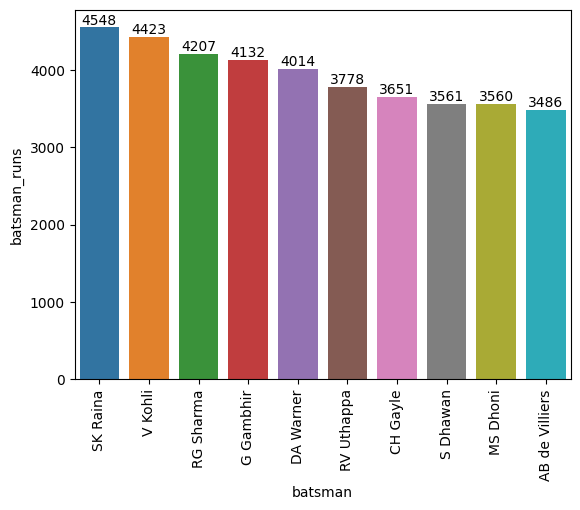

In [105]:
#batsman score maximum runs in ipl
temp=df2.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
m=temp.head(10)
m
ax=sns.barplot(x='batsman',y='batsman_runs',data=m)
plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i,)
ax


<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

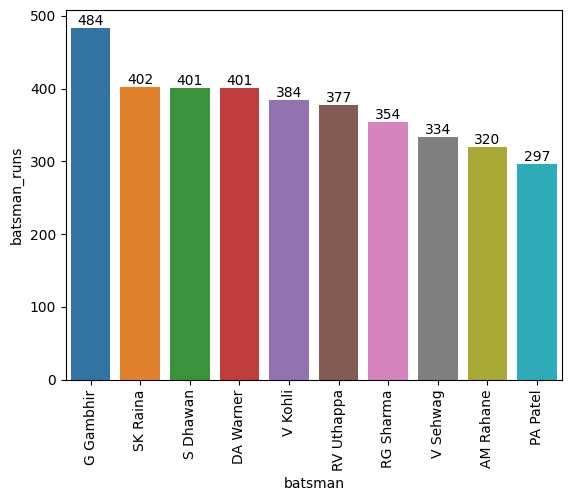

In [111]:
#most 4's in IPL
temp=df2.groupby('batsman')['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
n=temp.head(10)
ax=sns.barplot(x='batsman',y='batsman_runs',data=n)
plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i,)
ax


<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

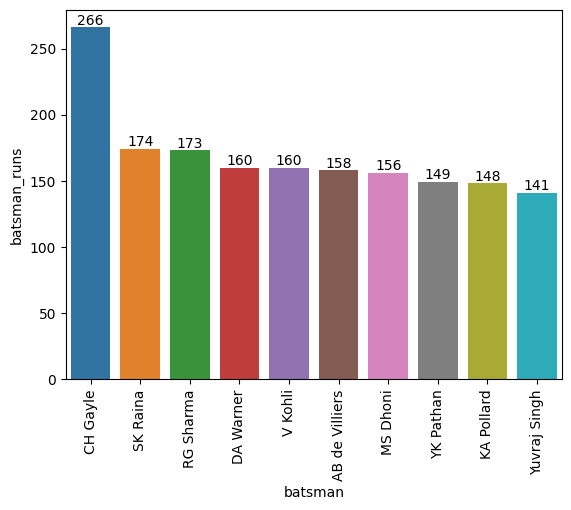

In [112]:
#most 6's in 
temp=df2.groupby('batsman')['batsman_runs'].agg(lambda x:(x==6).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
n=temp.head(10)
ax=sns.barplot(x='batsman',y='batsman_runs',data=n)
plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i,)
ax

<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

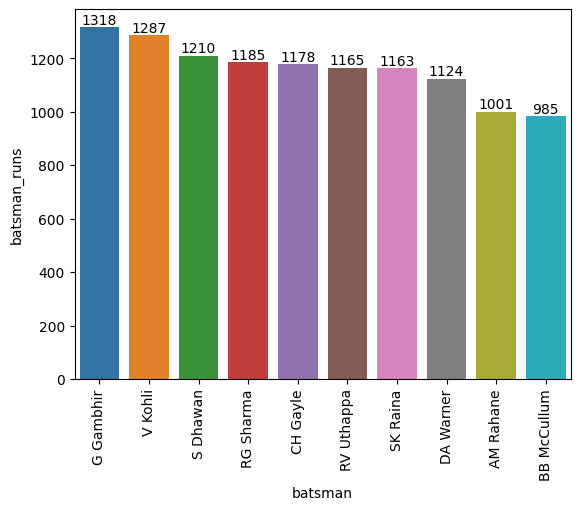

In [113]:
#batsman played number of dot balls
temp=df2.groupby('batsman')['batsman_runs'].agg(lambda x:(x==0).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
n=temp.head(10)
ax=sns.barplot(x='batsman',y='batsman_runs',data=n)
plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i,)
ax

<AxesSubplot:xlabel='bowler', ylabel='ball'>

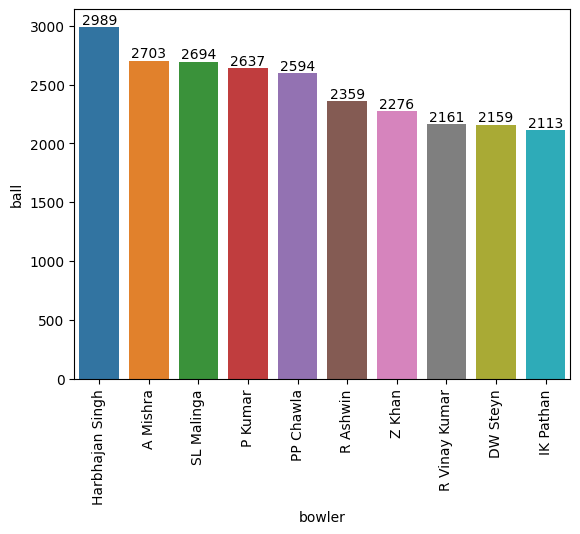

In [115]:
#bowler who bowled most balls
temp=df2.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball',ascending=False).reset_index(drop=True)
n=temp.head(10)
ax=sns.barplot(x='bowler',y='ball',data=n)
plt.xticks(rotation='vertical')
for i in ax.containers:
    ax.bar_label(i,)
ax

<AxesSubplot:xlabel='bowler', ylabel='count'>

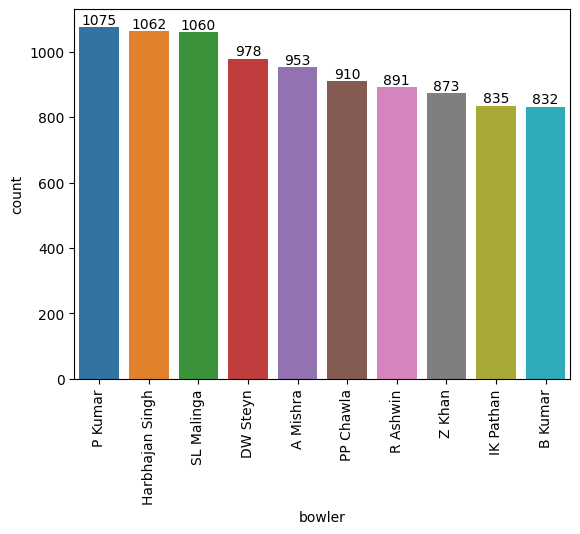

In [118]:
#bowler who bowled most dot ball
temp=df2.groupby('bowler')['total_runs'].agg(lambda x:(x==0).sum()).reset_index().sort_values(by='total_runs',ascending=False).reset_index(drop=True)
n=temp.head(10)
ax=sns.barplot(x='bowler',y='total_runs',data=n)
plt.xticks(rotation='vertical')
ax.set_ylabel('count')
for i in ax.containers:
    ax.bar_label(i,)
ax

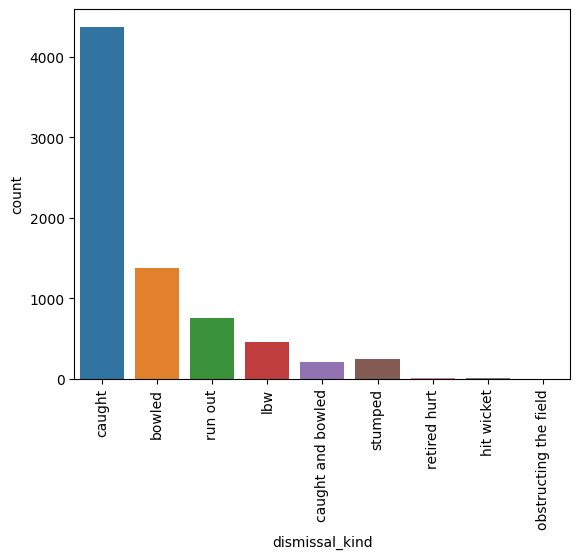

In [121]:
#most common dismissal type 
sns.countplot(x='dismissal_kind',data=df2)
plt.xticks(rotation='vertical')
plt.show()